# Notes for lab 1

In [61]:
import matplotlib.pyplot as plt
import numpy as np

def calc_em(i, v, r) -> float: 
    """
    Takes i in A
    v in V
    and r in cm
    """
    r = r/100
    return 2 * v / ((r*0.9)**2 * (7.8e-4 * i)**2)

# def calc_em(i, v, r) -> float: 
#     """
#     Takes i in A
#     v in V
#     and r in cm
#     """   
#     r = r/100
#     return v**(3.87245304e+00) * ((r**(6.79798495e-08)) * (2.16213101e+02) * (i**(5.76388951e-08)))

def calc_em_error(i, i_unc, v, v_unc, r, r_unc):
    """
    Takes i in A
    v in V
    and r in cm
    """
    r = r/100
    r_unc = r_unc/100
    c = 7.8e-4
    var = (2/(r * i * c)**2)**2 * v_unc**2 + (4*v/(r**2 * i**3 * c**2))**2 * i_unc**2 + (4 * v /(r**3 * i**2 * c**2)**2) * r_unc**2 
    return np.sqrt(var)

REAL_EM = 1.76e+11
C = 7.8e-4

$$ \frac{e}{m} = \frac{2V}{(7.8 \times 10^{-4})^2 r^2 I^2} $$

  I (A)    V (V)    R_left (cm)    R_right (cm)    R_avg (cm)    e/m (C/kg)    e/m error
-------  -------  -------------  --------------  ------------  ------------  -----------
  0.992    171.0            6.0             5.2          5.6      2.249e+11    6.546e+09
  1.073    150.0            5.3             5.1          5.2      1.955e+11    6.054e+09
  1.143    140.0            4.9             4.7          4.8      1.888e+11    6.087e+09
  1.211    150.0            5.6             5.0          5.3      1.478e+11    4.487e+09
  1.372    200.0            5.5             5.0          5.25     1.564e+11    3.692e+09
  1.06     180.0            6.0             6.0          6.0      1.806e+11    4.912e+09
  1.499    170.0            4.4             3.8          4.1      1.827e+11    4.85e+09
  1.551    140.0            3.7             3.4          3.55     1.874e+11    5.79e+09
  1.724    250.0            5.2             4.1          4.65     1.579e+11    3.108e+09
  1.842    280.0       

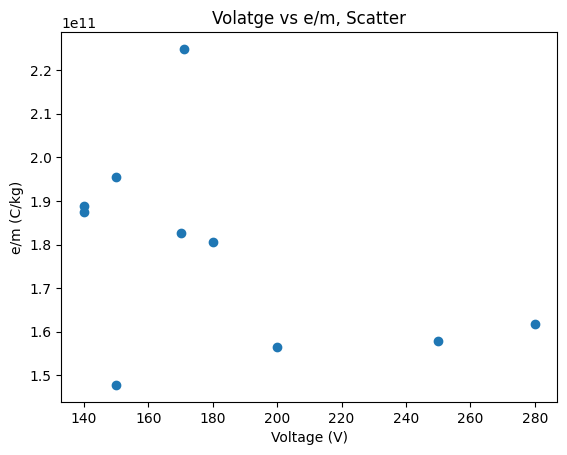

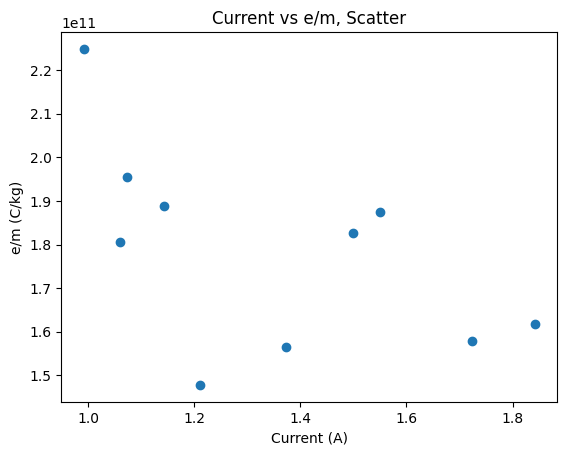

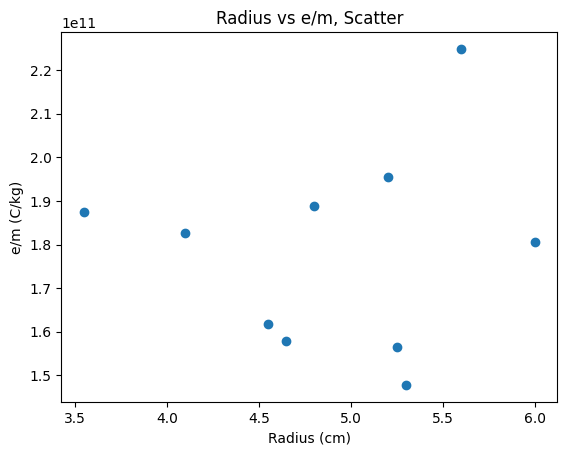

In [64]:
import numpy as np
from tabulate import tabulate

# scatter plot
currents = [.992, 1.073, 1.143, 1.211, 1.372, 1.060, 1.499, 1.551, 1.724, 1.842]
current_unc = 0.005
voltages = [171, 150, 140, 150, 200, 180, 170, 140, 250, 280]
voltage_unc = 5
left = [6, 5.3, 4.9, 5.6, 5.5, 6, 4.4, 3.7, 5.2, 5.1]
right = [5.2, 5.1, 4.7, 5, 5, 6, 3.8, 3.4, 4.1, 4]
radius_unc = 0.05

r_uncs = [np.std([l,r]) for l,r in zip(left, right)]
i_uncs = [0.01] * 10
v_uncs = [5] * 10

titles = ["I (A)", "V (V)", "R_left (cm)", "R_right (cm)", "R_avg (cm)", "e/m (C/kg)", "e/m error"]
data = []
data.append(currents)
data.append(voltages)
data.append(left)
data.append(right)

r_avg = [(r+l)/2 for r, l in zip(right, left)]
data.append(r_avg)

# r_avg = [(r+l)/2 for r, l in zip(right, left)]
# data.append(r_avg)


# line[1] = V
# line[0] = I
# line[4] = r
em = [calc_em(i, v, r) for v,i,r in zip(voltages, currents, r_avg)]
data.append(em)

em_uncs = [calc_em_error(i, i_unc, v, v_unc, r, r_unc) for 
    i, i_unc, v, v_unc, r, r_unc in zip(currents, i_uncs, voltages, v_uncs, r_avg, r_uncs)]
data.append(em_uncs)

print(tabulate(np.transpose(data), headers=titles, floatfmt='.4'))

print(f"{np.average(em):.4e}")

plt.scatter(voltages, em)
plt.xlabel("Voltage (V)")
plt.ylabel("e/m (C/kg)")
plt.title("Volatge vs e/m, Scatter")
plt.show()

plt.scatter(currents, em)
plt.xlabel("Current (A)")
plt.title("Current vs e/m, Scatter")
plt.ylabel("e/m (C/kg)")
plt.show()

plt.scatter(r_avg, em)
plt.xlabel("Radius (cm)")
plt.title("Radius vs e/m, Scatter")
plt.ylabel("e/m (C/kg)")
plt.show()

$$ \frac{e}{m} = \frac{2V}{(7.8 \times 10^{-4})^2 r^2 I^2} $$
$$ c r^2 = \frac{V}{I^2} $$

  I (A)    r1    r2    r3    r4    r_avg    r_unc        e/m    e/m error
-------  ----  ----  ----  ----  -------  -------  ---------  -----------
  1.054  6.45  6.5   6.25  6.3     6.375   0.2947  1.456e+11    4.595e+09
  1.141  6.05  6.15  6.0   5.9     6.025   0.2586  1.391e+11    4.269e+09
  1.229  5.75  5.9   5.8   5.7     5.787   0.3059  1.3e+11      3.907e+09
  1.316  5.55  5.5   5.45  5.4     5.475   0.3455  1.266e+11    3.748e+09
  1.404  5.15  5.1   5.15  5.1     5.125   0.2586  1.27e+11     3.682e+09
  1.491  4.9   4.75  4.9   5.0     4.888   0.1691  1.238e+11    3.526e+09
  1.579  4.65  4.7   4.6   4.65    4.65    0.4183  1.22e+11     3.505e+09
  1.666  4.5   4.35  4.4   4.4     4.412   0.5372  1.217e+11    3.533e+09
  1.754  4.25  4.15  4.15  4.25    4.2     0.2646  1.211e+11    3.372e+09
  1.841  4.05  3.85  4.05  4.0     3.987   0.2522  1.22e+11     3.37e+09


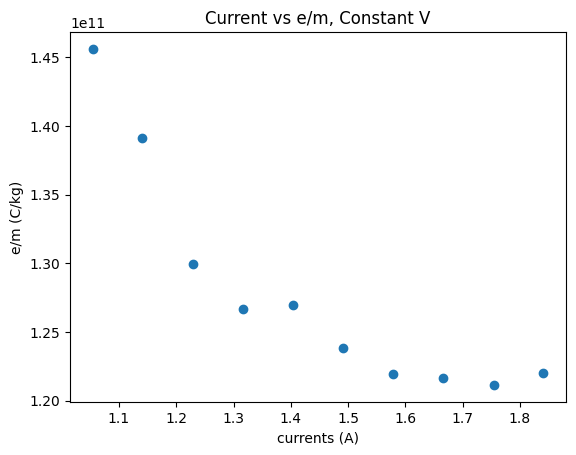

[1. 1. 1.]


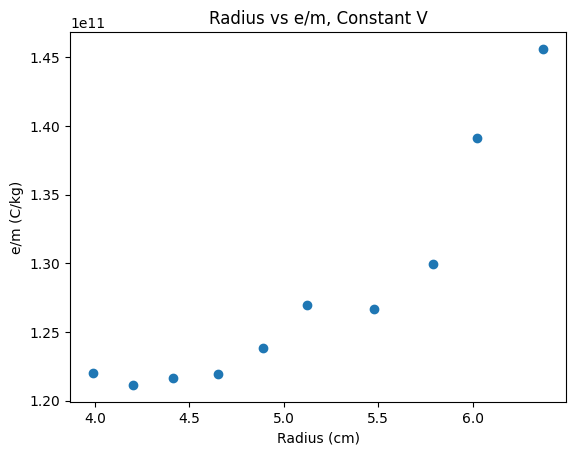

[1. 1. 1.]


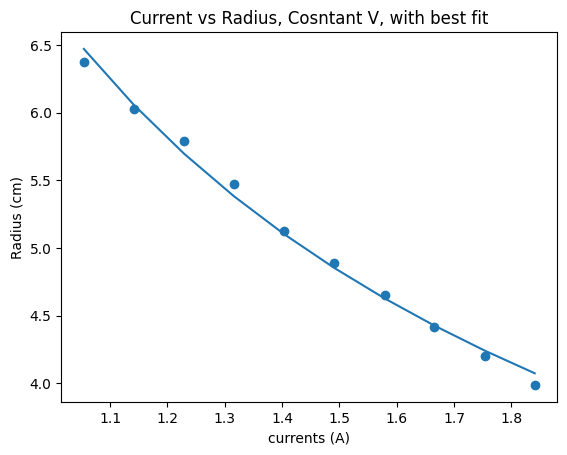

[ 6.76011742  1.         -0.82992363]
[5.76388951e-08 3.87245304e+00 6.79798495e-08 2.16213101e+02]


C:\Users\trist\AppData\Local\Temp\ipykernel_16304\1703980777.py:74: RuntimeWarning: overflow encountered in multiply
  return i**i_e * v**v_e * r**r_e * b


In [56]:
# constant V

import scipy.optimize as so
from sklearn import preprocessing

voltages = [200] * 10
currents = [1.054, 1.141, 1.229, 1.316, 1.404, 1.491, 1.579, 1.666, 1.754, 1.841]

r1_l = [6.9, 6.5, 6.0, 6.0, 5.5, 5.0, 4.5, 4.5, 4.0, 4.0]
r1_r = [6.0, 5.6, 5.5, 5.1, 4.8, 4.8, 4.8, 4.5, 4.5, 4.1]
r2_l = [6.5, 6.0, 5.5, 5.0, 5.0, 5.0, 5.5, 5.0, 4.0, 4.0]
r2_r = [6.5, 6.3, 6.3, 6.0, 5.2, 4.5, 3.9, 3.7, 4.3, 3.7]
r3_l = [6.5, 6.0, 6.0, 5.5, 5.5, 5.0, 4.5, 5.0, 4.5, 4.5]
r3_r = [6.0, 6.0, 5.6, 5.4, 4.8, 4.8, 4.7, 3.8, 3.8, 3.6]
r4_l = [6.5, 6.0, 6.0, 5.5, 5.0, 5.0, 4.5, 5.0, 4.5, 4.0]
r4_r = [6.1, 5.8, 5.4, 5.3, 5.2, 5.0, 4.8, 3.8, 4.0, 4.0]

def get_r(left:list, right:list) -> list:
    return [(l+r)/2 for l,r in zip(left, right)]

r1s = get_r(r1_l, r1_r)
r2s = get_r(r2_l, r2_r)
r3s = get_r(r3_l, r3_r)
r4s = get_r(r4_l, r4_r)
rs = [(r1+r2+r3+r4)/4 for r1,r2,r3,r4 in zip(r1s,r2s,r3s,r4s)]

ems = [calc_em(i, v, r) for i, v, r in zip(currents, voltages, rs)]

r_uncs = [np.std([a,b,c,d,e,f,g,h]) for a,b,c,d,e,f,g,h in zip(r1_r,r2_r,r3_r,r4_r,r1_l,r2_l,r3_l,r4_l)]
i_uncs = [0.01] * 10
v_uncs = [5] * 10

em_uncs = [calc_em_error(i, i_unc, v, v_unc, r, r_unc) for 
    i, i_unc, v, v_unc, r, r_unc in zip(currents, i_uncs, voltages, v_uncs, rs, r_uncs)]

print(tabulate(np.transpose([currents, r1s, r2s, r3s, r4s, rs, r_uncs, ems, em_uncs]), 
    headers=["I (A)", "r1", "r2", "r3", "r4", "r_avg", "r_unc", "e/m", "e/m error"], floatfmt=".4"))

def f(x, m, b, e):
    return m*np.power(x, e)


popt1, pcov = so.curve_fit(f, np.asarray(currents), np.asarray(ems), maxfev=10000)
plt.scatter(currents, ems)
# plt.plot(currents, f(np.asarray(currents), *popt1))
plt.xlabel("currents (A)")
plt.ylabel("e/m (C/kg)")
plt.title("Current vs e/m, Constant V")
plt.show()
print(popt1)

popt2, pcov = so.curve_fit(f, np.asarray(rs), np.asarray(ems), maxfev=10000)
plt.scatter(rs, ems)
# plt.plot(rs, f(np.asarray(rs), *popt2))
plt.xlabel("Radius (cm)")
plt.title("Radius vs e/m, Constant V")
plt.ylabel("e/m (C/kg)")
plt.show()
print(popt2)

popt3, pcov = so.curve_fit(f, np.asarray(currents), np.asarray(rs), maxfev=10000)
plt.scatter(currents, rs)
plt.xlabel("currents (A)")
plt.plot(currents, f(np.asarray(currents), *popt3))
plt.title("Current vs Radius, Cosntant V, with best fit")
plt.ylabel("Radius (cm)")
plt.show()
print(popt3)

def f(ivr, i_e, v_e, r_e, b) -> float:
    i = ivr[0]
    v = ivr[1]
    r = ivr[2]
    return i**i_e * v**v_e * r**r_e * b

popt, pcov = so.curve_fit(f, [np.asarray(currents),np.asarray(voltages),np.asarray(rs)], np.asarray([REAL_EM]*10))
print(popt)


    V    r1    r2    r3    r4    r_avg (cm)    r_unc        e/m    e/m error
-----  ----  ----  ----  ----  ------------  -------  ---------  -----------
150.0  3.85  3.8   3.95  3.8          3.85   0.1118   1.479e+11    5.388e+09
160.0  4.1   4.0   4.15  4.05         4.075  0.08292  1.408e+11    4.835e+09
170.0  4.35  4.25  4.3   4.25         4.287  0.1166   1.351e+11    4.425e+09
180.0  4.45  4.4   4.45  4.45         4.438  0.0696   1.336e+11    4.187e+09
190.0  4.55  4.55  4.65  4.65         4.6    0.1414   1.312e+11    3.907e+09
200.0  4.7   4.7   4.7   4.75         4.713  0.1763   1.316e+11    3.743e+09
210.0  4.75  4.8   4.85  4.85         4.812  0.2204   1.325e+11    3.701e+09
220.0  4.85  4.85  5.0   5.0          4.925  0.1639   1.325e+11    3.625e+09
230.0  5.05  5.0   5.15  5.1          5.075  0.192    1.305e+11    3.357e+09
240.0  5.15  5.2   5.2   5.2          5.188  0.2027   1.303e+11    3.249e+09


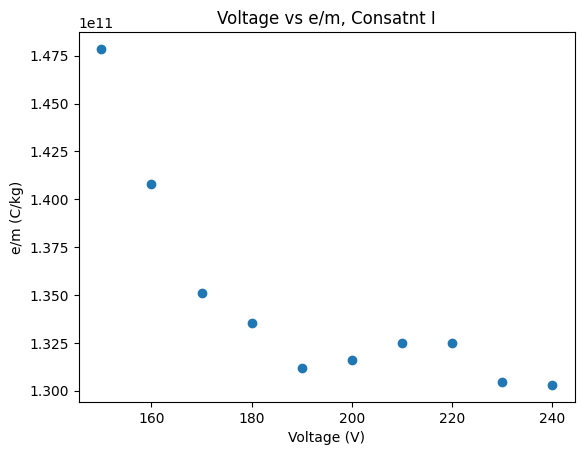

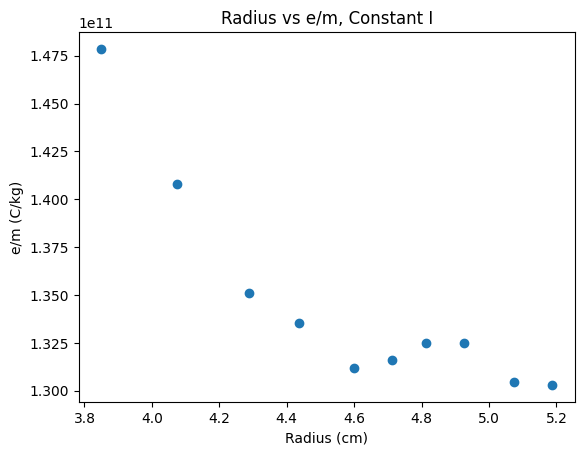

[123.4706146  -81.92715967 -80.94826071 228.08392592]
cant find popt6


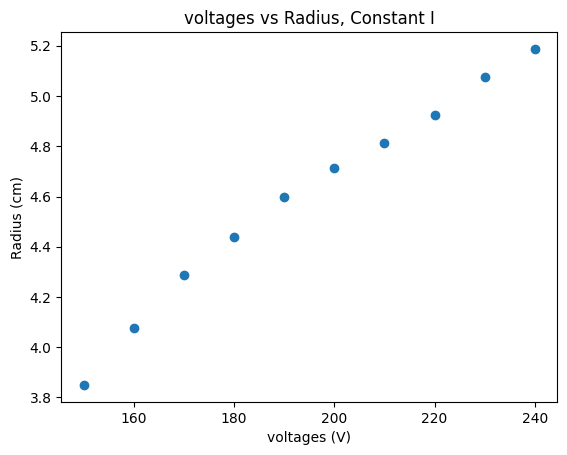

In [54]:
# constant I

currents = [1.5] * 10
voltages = [150, 160, 170, 180, 190, 200, 210, 220, 230, 240]

i_uncs = [0.01] * 10
v_uncs = [5] * 10

r1_l = [4.0, 4.2, 4.3, 4.5, 4.7, 4.9, 4.9, 5.0, 5.2, 5.3]
r1_r = [3.7, 4.0, 4.4, 4.4, 4.4, 4.5, 4.6, 4.7, 4.9, 5.0]
r2_l = [3.8, 4.0, 4.2, 4.5, 4.7, 4.9, 5.0, 5.0, 5.3, 5.5]
r2_r = [3.8, 4.0, 4.3, 4.3, 4.4, 4.5, 4.6, 4.7, 4.7, 4.9]
r3_l = [4.0, 4.1, 4.5, 4.5, 4.8, 4.9, 5.2, 5.2, 5.3, 5.4]
r3_r = [3.9, 4.2, 4.1, 4.4, 4.5, 4.5, 4.5, 4.8, 5.0, 5.0]
r4_l = [3.9, 4.0, 4.2, 4.5, 4.6, 4.8, 4.9, 5.0, 5.1, 5.1]
r4_r = [3.7, 4.1, 4.3, 4.4, 4.7, 4.7, 4.8, 5.0, 5.1, 5.3]

def get_r(left:list, right:list) -> list:
    return [(l+r)/2 for l,r in zip(left, right)]

r1s = get_r(r1_l, r1_r)
r2s = get_r(r2_l, r2_r)
r3s = get_r(r3_l, r3_r)
r4s = get_r(r4_l, r4_r)
rs = [(r1+r2+r3+r4)/4 for r1,r2,r3,r4 in zip(r1s,r2s,r3s,r4s)]
r_unc = [np.std([a,b,c,d,e,f,g,h]) for a,b,c,d,e,f,g,h in zip(r1_r,r2_r,r3_r,r4_r,r1_l,r2_l,r3_l,r4_l)]

ems2 = [calc_em(i, v, r) for i, v, r in zip(currents, voltages, rs)]

em_uncs2 = [calc_em_error(i, i_unc, v, v_unc, r, r_unc) for 
    i, i_unc, v, v_unc, r, r_unc in zip(currents, i_uncs, voltages, v_uncs, rs, r_uncs)]


print(tabulate(np.transpose([voltages, r1s, r2s, r3s, r4s, rs, r_unc, ems2, em_uncs2]), 
    headers=["V", "r1", "r2", "r3", "r4", "r_avg (cm)", "r_unc", "e/m", "e/m error"], floatfmt=".4"))

# def f(x, m, b, e):
#     return m*np.power(x, e)
def f2(x, m, b, e):
    return m*np.power(x, 1) + b

# popt4, pcov = so.curve_fit(f, np.asarray(voltages), np.asarray(ems2), maxfev=20000)
plt.scatter(voltages, ems2)
# plt.plot(voltages, f(np.asarray(voltages), *popt4))
plt.xlabel("Voltage (V)")
plt.ylabel("e/m (C/kg)")
plt.title("Voltage vs e/m, Consatnt I")
plt.show()
# print(popt4)

# popt5, pcov = so.curve_fit(f, np.asarray(rs), np.asarray(ems2), maxfev=10000)
plt.scatter(rs, ems2)
plt.xlabel("Radius (cm)")
plt.title("Radius vs e/m, Constant I")
plt.ylabel("e/m (C/kg)")
plt.show()
# print(popt5)

# def pred_r(i, v)

try:
    popt6, pcov = so.curve_fit(f, np.asarray(voltages), np.asarray(rs), maxfev=100000)
    print(popt6)
    plt.plot(voltages, f(np.asarray(voltages), *popt6))
    # popt7, pcov = so.curve_fit(f2, np.asarray(voltages), np.asarray(rs), maxfev=100000)
    # print(popt7)
    # plt.plot(voltages, f2(np.asarray(voltages), *popt7))
except:
    print("cant find popt6")
plt.scatter(voltages, rs)
plt.xlabel("voltages (V)")
plt.title("voltages vs Radius, Constant I")
plt.ylabel("Radius (cm)")
plt.show()



In [65]:
# total average e/m

print(f"Average: {np.average(em + ems + ems2):.4e}")
print(f"STD: {np.std(em + ems + ems2):.4e}")
print(f"Percent error: {np.abs(np.average(em + ems + ems2)-REAL_EM)/REAL_EM:%}")
print(f"Our presicion in percent form is {np.std(em + ems + ems2)/np.average(em + ems + ems2):%}")

Average: 1.4695e+11
STD: 2.6279e+10
Percent error: 16.506756%
Our presicion in percent form is 17.883287%
